In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import OpenDartReader
api_key = '********'
dart = OpenDartReader(api_key)

card_companys = pd.DataFrame(dart.company_by_name('카드'))
card_companys = card_companys[card_companys['induty_code'] == '64913']

In [ ]:
def final_report_date(corp_code):
    report = dart.list(corp_code, start='2021-01-01', kind='A')
    try:
        date = report.loc[0, 'rcept_dt']
    except:
        date = '00010101'
    return date

In [ ]:
card_companys['frpt_dt'] = card_companys['corp_code'].apply(final_report_date)
card_companys = card_companys[card_companys['frpt_dt'] != '00010101']

card_df = card_companys[['corp_code', 'stock_name']]
card_df.columns = ['code', 'name']

year_list = list(range(2015, 2021))
year_col = pd.Series(year_list * len(card_df), index=card_df.index.repeat(len(year_list)), name='year')

card_df = card_df.join(year_col)

{"status":"013","message":"조회된 데이타가 없습니다."}
{"status":"013","message":"조회된 데이타가 없습니다."}
{"status":"013","message":"조회된 데이타가 없습니다."}
{"status":"013","message":"조회된 데이타가 없습니다."}


In [ ]:
def salary_history(company_df):
    res = pd.DataFrame(columns=['code', 'name', 'year', 'sex', 'salary'])
    report = dart.report(company_df.iloc[0]['code'], '직원', company_df.iloc[0]['year'])
    if report is not None:
        res[['sex', 'salary']] = report[['sexdstn', 'jan_salary_am']]
        res['salary'] = pd.to_numeric(res['salary'].str.replace(',',''))
    res[['code', 'name', 'year']] = company_df.iloc[0][['code', 'name', 'year']]
    return res

In [ ]:
card_salary = card_df.groupby(['code','year'], group_keys=False).apply(salary_history)
card_salary_men = card_salary[card_salary['sex'] == '남'].pivot(index='year', columns='name', values='salary')
card_salary_women = card_salary[card_salary['sex'] == '여'].pivot(index='year', columns='name', values='salary')

card_salary_men.columns = ['Lotte', 'BC', 'Samsung', 'Shinhan', 'Woori', 'KB', 'Hana', 'Hyundai']
card_salary_women.columns = ['Lotte', 'BC', 'Samsung', 'Shinhan', 'Woori', 'KB', 'Hana', 'Hyundai']
card_salary_men = card_salary_men / 1000000
card_salary_women = card_salary_women / 1000000

card_salary_diff = card_salary_men - card_salary_women

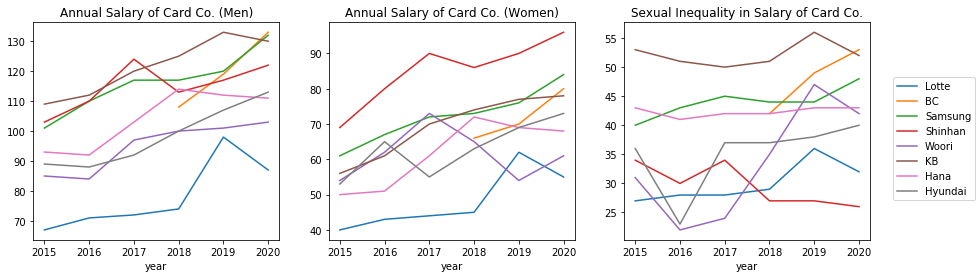

In [ ]:
fig = plt.figure(figsize=(15,4))
axes = fig.subplots(nrows=1, ncols=3)
card_salary_men.plot(ax=axes[0], title='Annual Salary of Card Co. (Men)')
card_salary_women.plot(ax=axes[1], title='Annual Salary of Card Co. (Women)')
card_salary_diff.plot(ax=axes[2], title='Sexual Inequality in Salary of Card Co.')
for ax in axes:
    ax.get_legend().remove()
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'right')